Problem Statement
1) Calories_consumed-> predict weight gained using calories consumed
2) Delivery_time -> Predict delivery time using sorting time 
3) Emp_data -> Build a prediction model for Churn_out_rate 
4) Salary_hike -> Build a prediction model for Salary_hike


Do the necessary transformations for input variables for getting better R^2 value for the model prepared.




Importing the necessary libraries to perform the regression

In [2]:
import pandas as pd# deals with data frame  
import numpy as np# deals with numerical values
import matplotlib.pylab as plt #for different types of plots
import statsmodels.formula.api as smf# for generating model 

In [15]:
cal = pd.read_csv('calories_consumed.csv')

In [16]:
cal.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


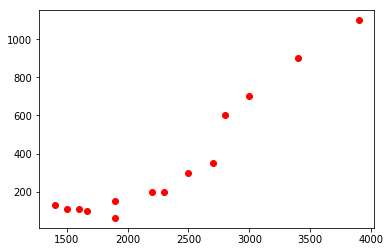

In [17]:
plt.scatter(cal['Calories Consumed'],cal['Weight gained (grams)'],color='Red')

By looking at the plot we can say that there is some correlation in positive direction

In [18]:
np.corrcoef(cal['Calories Consumed'],cal['Weight gained (grams)'])

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

By looking at the correlation coefficients we can confirm that there is stron correlation

Lets build model first so that based on the R^2 Value we can peform any transformations

In [11]:
cal.columns = [cname.replace(' ','_') for cname in cal.columns]

In [25]:
cal.rename(columns={'Weight gained (grams)':'wg','Calories Consumed':'cc'},inplace=True)

In [33]:
model = smf.ols('wg~cc',data=cal).fit()

In [34]:
model.params

Intercept   -625.752356
cc             0.420157
dtype: float64

In [36]:
model.summary()

c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wg   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           2.86e-07
Time:                        15:17:57   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
cc             0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

That is a pretty good R^2 Value we have got. So we can leave it here itself

In [44]:

pred = model.predict(pd.DataFrame(cal['cc']))


In [ ]:
The above statements is used to calculate the predicted values
The below statement is used to show the confidence interval in which the values can be predicted at 95%

In [42]:
print (model.conf_int(0.05))

                    0           1
Intercept -845.426655 -406.078057
cc           0.330506    0.509807
